In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt


In [2]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import tensorflow as tf
import tensorflow.keras as k
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, AveragePooling2D, Flatten, Dropout

In [3]:
path_folder = "Multi cancer"
class_name = os.listdir(path_folder)
class_name

['Brain cancer',
 'Brain Healthy',
 'Kidney cancer',
 'Kidney Healthy',
 'Lung cancer',
 'Lung Healthy',
 'Oral cancer',
 'Oral Healthy']

In [4]:
path_folder = "Multi cancer"
class_name = os.listdir(path_folder)
class_name.sort()
#class_name = class_name[:4] + class_name[20:23]
print(class_name)
image_data = []
label_data = []
count = 0
for folder in class_name:
    images = os.listdir(path_folder + "/" + folder)
    print("Loading Folder -- {} " .format(folder), "The Count of Classes ==> ",count)
    for img in images:
        image = cv2.imread(path_folder + "/" + folder + "/" + img)
        image = cv2.resize(image, (100, 100))
        
        image_data.append(image)
        label_data.append(count)
    count += 1
print("---- Done ----------- ")

['Brain Healthy', 'Brain cancer', 'Kidney Healthy', 'Kidney cancer', 'Lung Healthy', 'Lung cancer', 'Oral Healthy', 'Oral cancer']
Loading Folder -- Brain Healthy  The Count of Classes ==>  0
Loading Folder -- Brain cancer  The Count of Classes ==>  1
Loading Folder -- Kidney Healthy  The Count of Classes ==>  2
Loading Folder -- Kidney cancer  The Count of Classes ==>  3
Loading Folder -- Lung Healthy  The Count of Classes ==>  4
Loading Folder -- Lung cancer  The Count of Classes ==>  5
Loading Folder -- Oral Healthy  The Count of Classes ==>  6
Loading Folder -- Oral cancer  The Count of Classes ==>  7
---- Done ----------- 


In [5]:
data = np.array(image_data)
data = data.astype("float32")
data = data/255.0

label = np.array(label_data)

In [6]:
print(data.shape)

(500, 100, 100, 3)


In [7]:
label_num = to_categorical(label, len(class_name))
label_num[100]

array([0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [8]:
x_img, y_img = shuffle(data, label_num)
x_train, x_test, y_train, y_test = train_test_split(x_img, y_img, train_size=0.8)

In [9]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((400, 100, 100, 3), (400, 8), (100, 100, 100, 3), (100, 8))

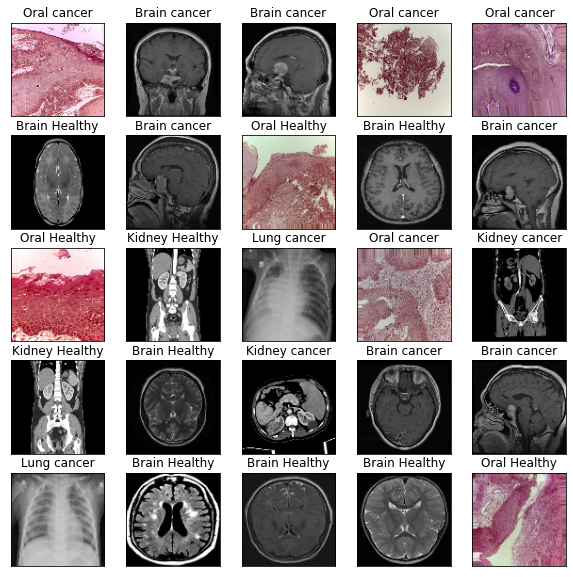

In [10]:
plt.figure(figsize=(10, 10))
for i in range(0, 25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.title(class_name[np.argmax(y_train[i])])

In [11]:
model = k.models.Sequential()

model.add(k.layers.Conv2D(16, (5, 5), activation="relu", input_shape=(100, 100, 3), padding="same"))
model.add(k.layers.AveragePooling2D((2, 2)))

model.add(k.layers.Conv2D(32, (4, 4), activation="relu",  padding="same"))
# model.add(k.layers.BatchNormalization())
model.add(k.layers.AveragePooling2D((2, 2)))


model.add(k.layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(k.layers.AveragePooling2D((2, 2)))

model.add(k.layers.Conv2D(128, (2, 2), activation="relu", padding="same"))
model.add(k.layers.MaxPool2D((2, 2)))

model.add(k.layers.Flatten())

model.add(k.layers.Dense(256, activation="relu"))
# model.add(k.layers.BatchNormalization())
model.add(k.layers.Dropout(0.5))

model.add(k.layers.Dense(32, activation="relu"))
model.add(k.layers.Dropout(0.2))

model.add(k.layers.Dense(8, activation="softmax"))

model.compile(optimizer="adam", loss=k.losses.CategoricalCrossentropy(), metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      1216      
                                                                 
 average_pooling2d (Average  (None, 50, 50, 16)        0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        8224      
                                                                 
 average_pooling2d_1 (Avera  (None, 25, 25, 32)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 average_pooling2d_2 (Avera  (None, 12, 12, 64)        0

In [12]:
history = model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test), validation_split=0.2)

Epoch 1/25
13/13 [==============================] - 5s 275ms/step - loss: 2.0096 - accuracy: 0.2200 - val_loss: 1.7020 - val_accuracy: 0.5700
Epoch 2/25
13/13 [==============================] - 3s 244ms/step - loss: 1.5524 - accuracy: 0.4600 - val_loss: 1.0256 - val_accuracy: 0.6700
Epoch 3/25
13/13 [==============================] - 3s 222ms/step - loss: 1.2144 - accuracy: 0.5575 - val_loss: 0.7912 - val_accuracy: 0.6300
Epoch 4/25
13/13 [==============================] - 3s 218ms/step - loss: 0.9636 - accuracy: 0.6025 - val_loss: 0.6578 - val_accuracy: 0.7300
Epoch 5/25
13/13 [==============================] - 3s 241ms/step - loss: 0.8368 - accuracy: 0.6950 - val_loss: 0.5106 - val_accuracy: 0.7500
Epoch 6/25
13/13 [==============================] - 3s 239ms/step - loss: 0.6757 - accuracy: 0.7300 - val_loss: 0.4983 - val_accuracy: 0.7800
Epoch 7/25
13/13 [==============================] - 3s 231ms/step - loss: 0.6487 - accuracy: 0.7500 - val_loss: 0.4561 - val_accuracy: 0.7500
Epoch 

4/4 [==============================] - 0s 39ms/step
Confusion Matrix:
[[26  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0]
 [ 0  0 11  0  0  0  0  0]
 [ 0  0  0  7  0  0  0  0]
 [ 0  0  0  0  8  1  0  0]
 [ 0  0  0  0  1  8  0  0]
 [ 0  0  0  0  0  0  5  3]
 [ 0  0  0  0  0  0  5  5]]


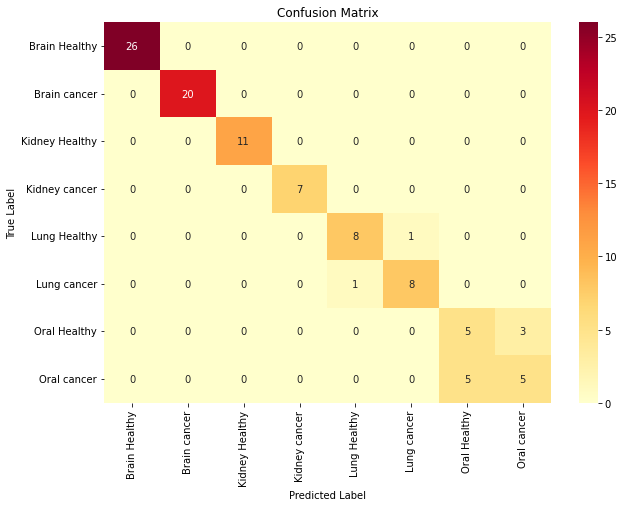

Classification Report:
                precision    recall  f1-score   support

 Brain Healthy       1.00      1.00      1.00        26
  Brain cancer       1.00      1.00      1.00        20
Kidney Healthy       1.00      1.00      1.00        11
 Kidney cancer       1.00      1.00      1.00         7
  Lung Healthy       0.89      0.89      0.89         9
   Lung cancer       0.89      0.89      0.89         9
  Oral Healthy       0.50      0.62      0.56         8
   Oral cancer       0.62      0.50      0.56        10

      accuracy                           0.90       100
     macro avg       0.86      0.86      0.86       100
  weighted avg       0.90      0.90      0.90       100



In [13]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn

# Generate predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Print and plot the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Create a DataFrame from the confusion matrix
df_cm = pd.DataFrame(conf_matrix, index=class_name, columns=class_name)  # Adjust if you have a different number of classes

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sn.heatmap(df_cm, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=class_name)
print("Classification Report:")
print(report)


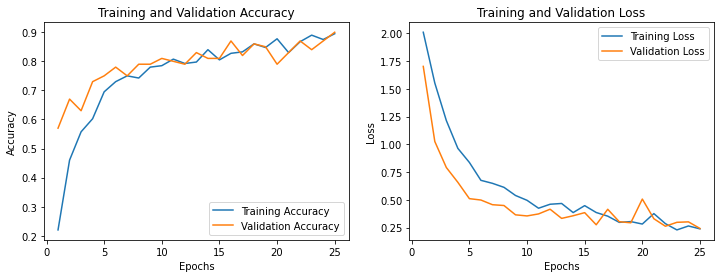

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(acc) + 1)

# Plotting accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.show()

In [15]:
loss, accuracy = model.evaluate(x_test, y_test)

print(f"The Accuracy Testing Data is ==> {accuracy} %")
print(f"The loss Testing Data is ==> {loss}")

4/4 [==============================] - 0s 41ms/step - loss: 0.2423 - accuracy: 0.9000
The Accuracy Testing Data is ==> 0.8999999761581421 %
The loss Testing Data is ==> 0.24227140843868256


In [16]:
loss, accuracy = model.evaluate(x_train, y_train)

print(f"The Accuracy training Data is ==> {accuracy} %")
print(f"The loss training Data is ==> {loss}")

13/13 [==============================] - 1s 51ms/step - loss: 0.1380 - accuracy: 0.9450
The Accuracy training Data is ==> 0.9449999928474426 %
The loss training Data is ==> 0.13801276683807373


In [17]:
import tensorflow as tf
from keras.models import load_model
model.save('model.h5')

1/1 [==============================] - 0s 144ms/step


Text(0.5, 1.0, 'Oral Cancer')

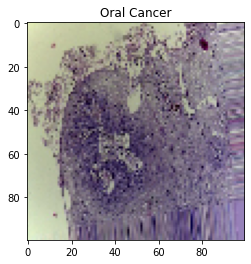

In [30]:
from glob import glob
#Test_image_path = os.path.join(data_dir_test, class_names[1], '*')
Test_image = glob('upload/8 (1).jpg')
Test_image = load_img(Test_image[-1],target_size=(100,100))
plt.imshow(Test_image)
plt.grid(False)
model=load_model('model.h5')
img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
#pred_class = class_names[pred]
if pred==0:
    res='Brain Healthy'
elif pred==1:
    res='Brain Cancer'
elif pred==2:
    res='Kidney Healthy'
elif pred==3:
    res='Kidney Cancer'
elif pred==4:
    res='Lung Healthy'
elif pred==5:
    res='Lung Cancer'
elif pred==6:
    res='Oral Healthy'
elif pred==7:
    res='Oral Cancer'
plt.title(res)